In [1]:
# import necessary Python packages
import os
import numpy as np
import matplotlib.pyplot as plt
import scipy as scipy

cc=299792458      # m/s

In [2]:
sx,wake=np.genfromtxt("wake_mono_172m.txt", unpack=True)

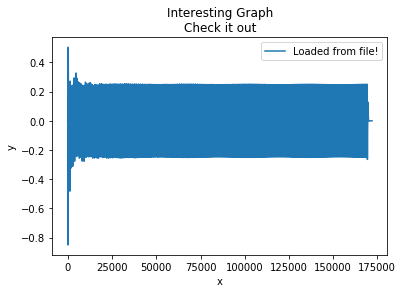

In [3]:
plt.plot(sx,wake,label='Loaded from file!')

plt.xlabel('x')
plt.ylabel('y')
plt.title('Interesting Graph\nCheck it out')
plt.legend()
plt.show()

In [4]:
wakeSinput_original = sx*0.001;
wakefieldInput_original = wake;

In [5]:
# window
#define cos window
Nsampling=2**24
Nsample_input=np.size(wakeSinput_original)
Coswindow=np.zeros(Nsample_input)
dt_wake=wakeSinput_original[20]-wakeSinput_original[19]
ST_input=(Nsample_input-1)*dt_wake
x_wake = np.linspace(0.0,(Nsample_input-1)*dt_wake,Nsample_input)

Coswindow=map(lambda x:(np.cos(x/ST_input*np.pi/2))**2,x_wake)

ycoswindow_original=Coswindow*wakefieldInput_original
np.size(Coswindow)-Nsample_input
## pading
Npadding=Nsampling-Nsample_input
wakefieldpadding=np.zeros(Npadding)

ysample_padded=np.append(ycoswindow_original,wakefieldpadding)
#plt.plot(ysample_padded)

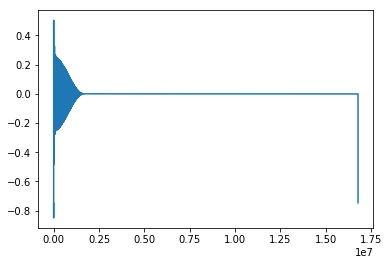

In [6]:
# moved bunch

zeroIndex=1647 #1648

wakefieldInput_head=ysample_padded[0:zeroIndex]
wakefieldInput_rest=ysample_padded[zeroIndex+1:np.size(ysample_padded)-zeroIndex]

wakefieldInput=np.append(wakefieldInput_rest,wakefieldInput_head)
plt.plot(wakefieldInput)

In [7]:
#########
from scipy.fftpack import fft, fftfreq, fftshift
Wakefft = fft(wakefieldInput)  #/winTriWindow_correct  
Wakefftnomalized=dt_wake*Wakefft

freqFFT=fftfreq(Nsampling, dt_wake/cc)
df_FFT = freqFFT[2]-freqFFT[1]

print("df_FFT =",(freqFFT[20]-freqFFT[19])/1e6)

('df_FFT =', 0.17193325281849411)


[1071.19046858 1075.79527599]


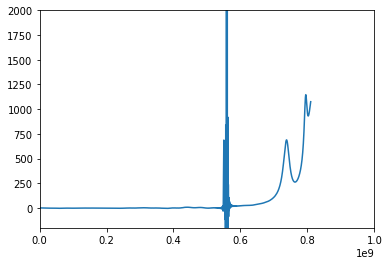

In [8]:
nx=int(np.floor(0.81e9/df_FFT))
#plt.plot(freqFFT[1:nx],np.imag(Wakefft[1:nx]),label="imag")
p1=plt.plot(freqFFT[1:nx],-1*np.real(Wakefft)[1:nx],label="real")
plt.ylim(-200,2000)
plt.xlim(0,1e9)
print(-1*np.real(Wakefft)[nx-2:nx])

In [9]:
# import
freqJulia,wakeJulia=np.genfromtxt("waketocheckwithpython.txt",unpack=True)

(0, 1000000000.0)

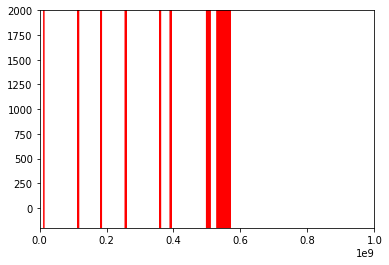

In [10]:
nx=np.int(np.floor(5e9/(freqJulia[2]-freqJulia[1])))
p2=plt.plot(freqJulia[1:nx],(wakeJulia[1:nx]),"r-",label="real_original")
plt.ylim(-200,2000)
plt.xlim(0,1e9)

(0, 1000000000.0)

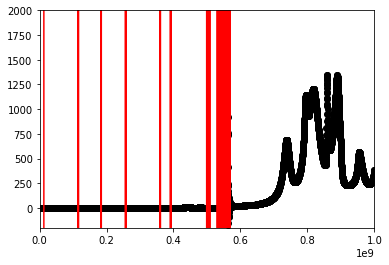

In [11]:
p1=plt.plot(freqFFT[1:nx],-1*np.real(Wakefft)[1:nx],"ko",label="real")
p2=plt.plot(freqJulia[1:nx],(wakeJulia[1:nx]),"r-",label="real_original")
plt.ylim(-200,2000)
plt.xlim(0,1e9)

# FFT gaussian bunch

In [76]:
def Gaussion(s,n,offZero,sigmat):
    return 1/np.sqrt(2*np.pi)/(sigmat*cc)*np.exp(-0.5*((s-offZero*cc*sigmat)/(cc*sigmat))**2) 
ds_gaussian=dt_wake # in meter
Nshift=1648*2;s_start=-Nshift/2*ds_gaussian;s_end=Nshift/2*ds_gaussian
resample_gaussian=np.zeros(np.size(wakeSinput_original))
for i in range(1,Nshift,1):
    s=(Nshift/2-i)*ds_gaussian
    resample_gaussian[i]=Gaussion(s,0,0,0.02/cc)



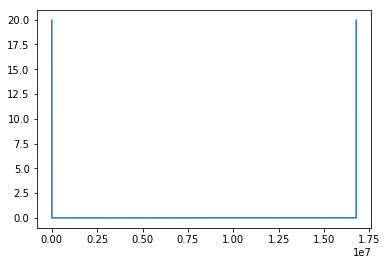

In [77]:
# window
#define cos window
Nsampling=2**24                                
Nsample_input=np.size(wakeSinput_original)     ####
Coswindow=np.zeros(Nsample_input)
dt_wake=wakeSinput_original[20]-wakeSinput_original[19]
ST_input=(Nsample_input-1)*dt_wake
x_wake = np.linspace(0.0,(Nsample_input-1)*dt_wake,Nsample_input)

Coswindow=map(lambda x:np.cos(x/ST_input*np.pi/2),x_wake)

ycoswindow_original=Coswindow*resample_gaussian     ####  Here is the change
np.size(Coswindow)-Nsample_input
## pading
Npadding=Nsampling-Nsample_input
wakefieldpadding=np.zeros(Npadding)

ysample_padded=np.append(ycoswindow_original,wakefieldpadding)
#plt.plot(ysample_padded)

# moved bunch

zeroIndex=1647 #1648

wakefieldInput_head=ysample_padded[0:zeroIndex]
wakefieldInput_rest=ysample_padded[zeroIndex+1:np.size(ysample_padded)-zeroIndex]

wakefieldInput=np.append(wakefieldInput_rest,wakefieldInput_head)
plt.plot(wakefieldInput)

In [56]:
#########
from scipy.fftpack import fft, fftfreq, fftshift
Wakefft = fft(wakefieldInput)  #/winTriWindow_correct  
Wakefftnomalized=dt_wake*Wakefft

freqFFT=fftfreq(Nsampling, dt_wake/cc)
df_FFT = freqFFT[2]-freqFFT[1]

print("df_FFT =",(freqFFT[20]-freqFFT[19])/1e6)

('df_FFT =', 0.17193325281849411)


(-1000000000.0, 10000000000.0)

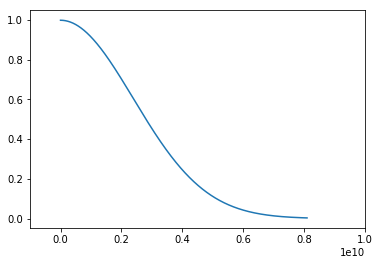

In [67]:
nx=int(np.floor(8.1e9/df_FFT))
#plt.plot(freqFFT[1:nx],np.imag(Wakefft[1:nx]),label="imag")
plt.plot(freqFFT[1:nx],1*np.real(Wakefftnomalized)[1:nx],label="real")
#plt.ylim(-200,2000)
plt.xlim(-1e9,10e9)
#print(-1*np.real(Wakefft)[nx-2:nx])